In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.decomposition import PCA

In [6]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})

In [12]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [67]:
model = tree.DecisionTreeClassifier(max_depth=6,  max_features= 20000)

In [68]:
model.fit(imagesTrain[0:5000],labelsTrain['smiling'][0:5000])

DecisionTreeClassifier(max_depth=6, max_features=20000)

In [69]:
model.score(imagesTest[0:1000],labelsTest['smiling'][0:1000])

0.821

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [55]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

[Text(0.5229166666666667, 0.9166666666666666, 'X[31955] <= 136.5\nentropy = 1.0\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.26666666666666666, 0.75, 'X[26984] <= 123.5\nentropy = 0.868\nsamples = 2450\nvalue = [1741, 709]'),
 Text(0.13333333333333333, 0.5833333333333334, 'X[31778] <= 77.5\nentropy = 0.975\nsamples = 1539\nvalue = [911, 628]'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[26233] <= 103.5\nentropy = 0.657\nsamples = 525\nvalue = [436, 89]'),
 Text(0.03333333333333333, 0.25, 'X[31405] <= 55.5\nentropy = 0.881\nsamples = 250\nvalue = [175, 75]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.568\nsamples = 142\nvalue = [123, 19]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.999\nsamples = 108\nvalue = [52, 56]'),
 Text(0.1, 0.25, 'X[36970] <= 116.5\nentropy = 0.29\nsamples = 275\nvalue = [261, 14]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.111\nsamples = 202\nvalue = [199, 3]'),
 Text(0.11666666666666667, 0.0833333333333333

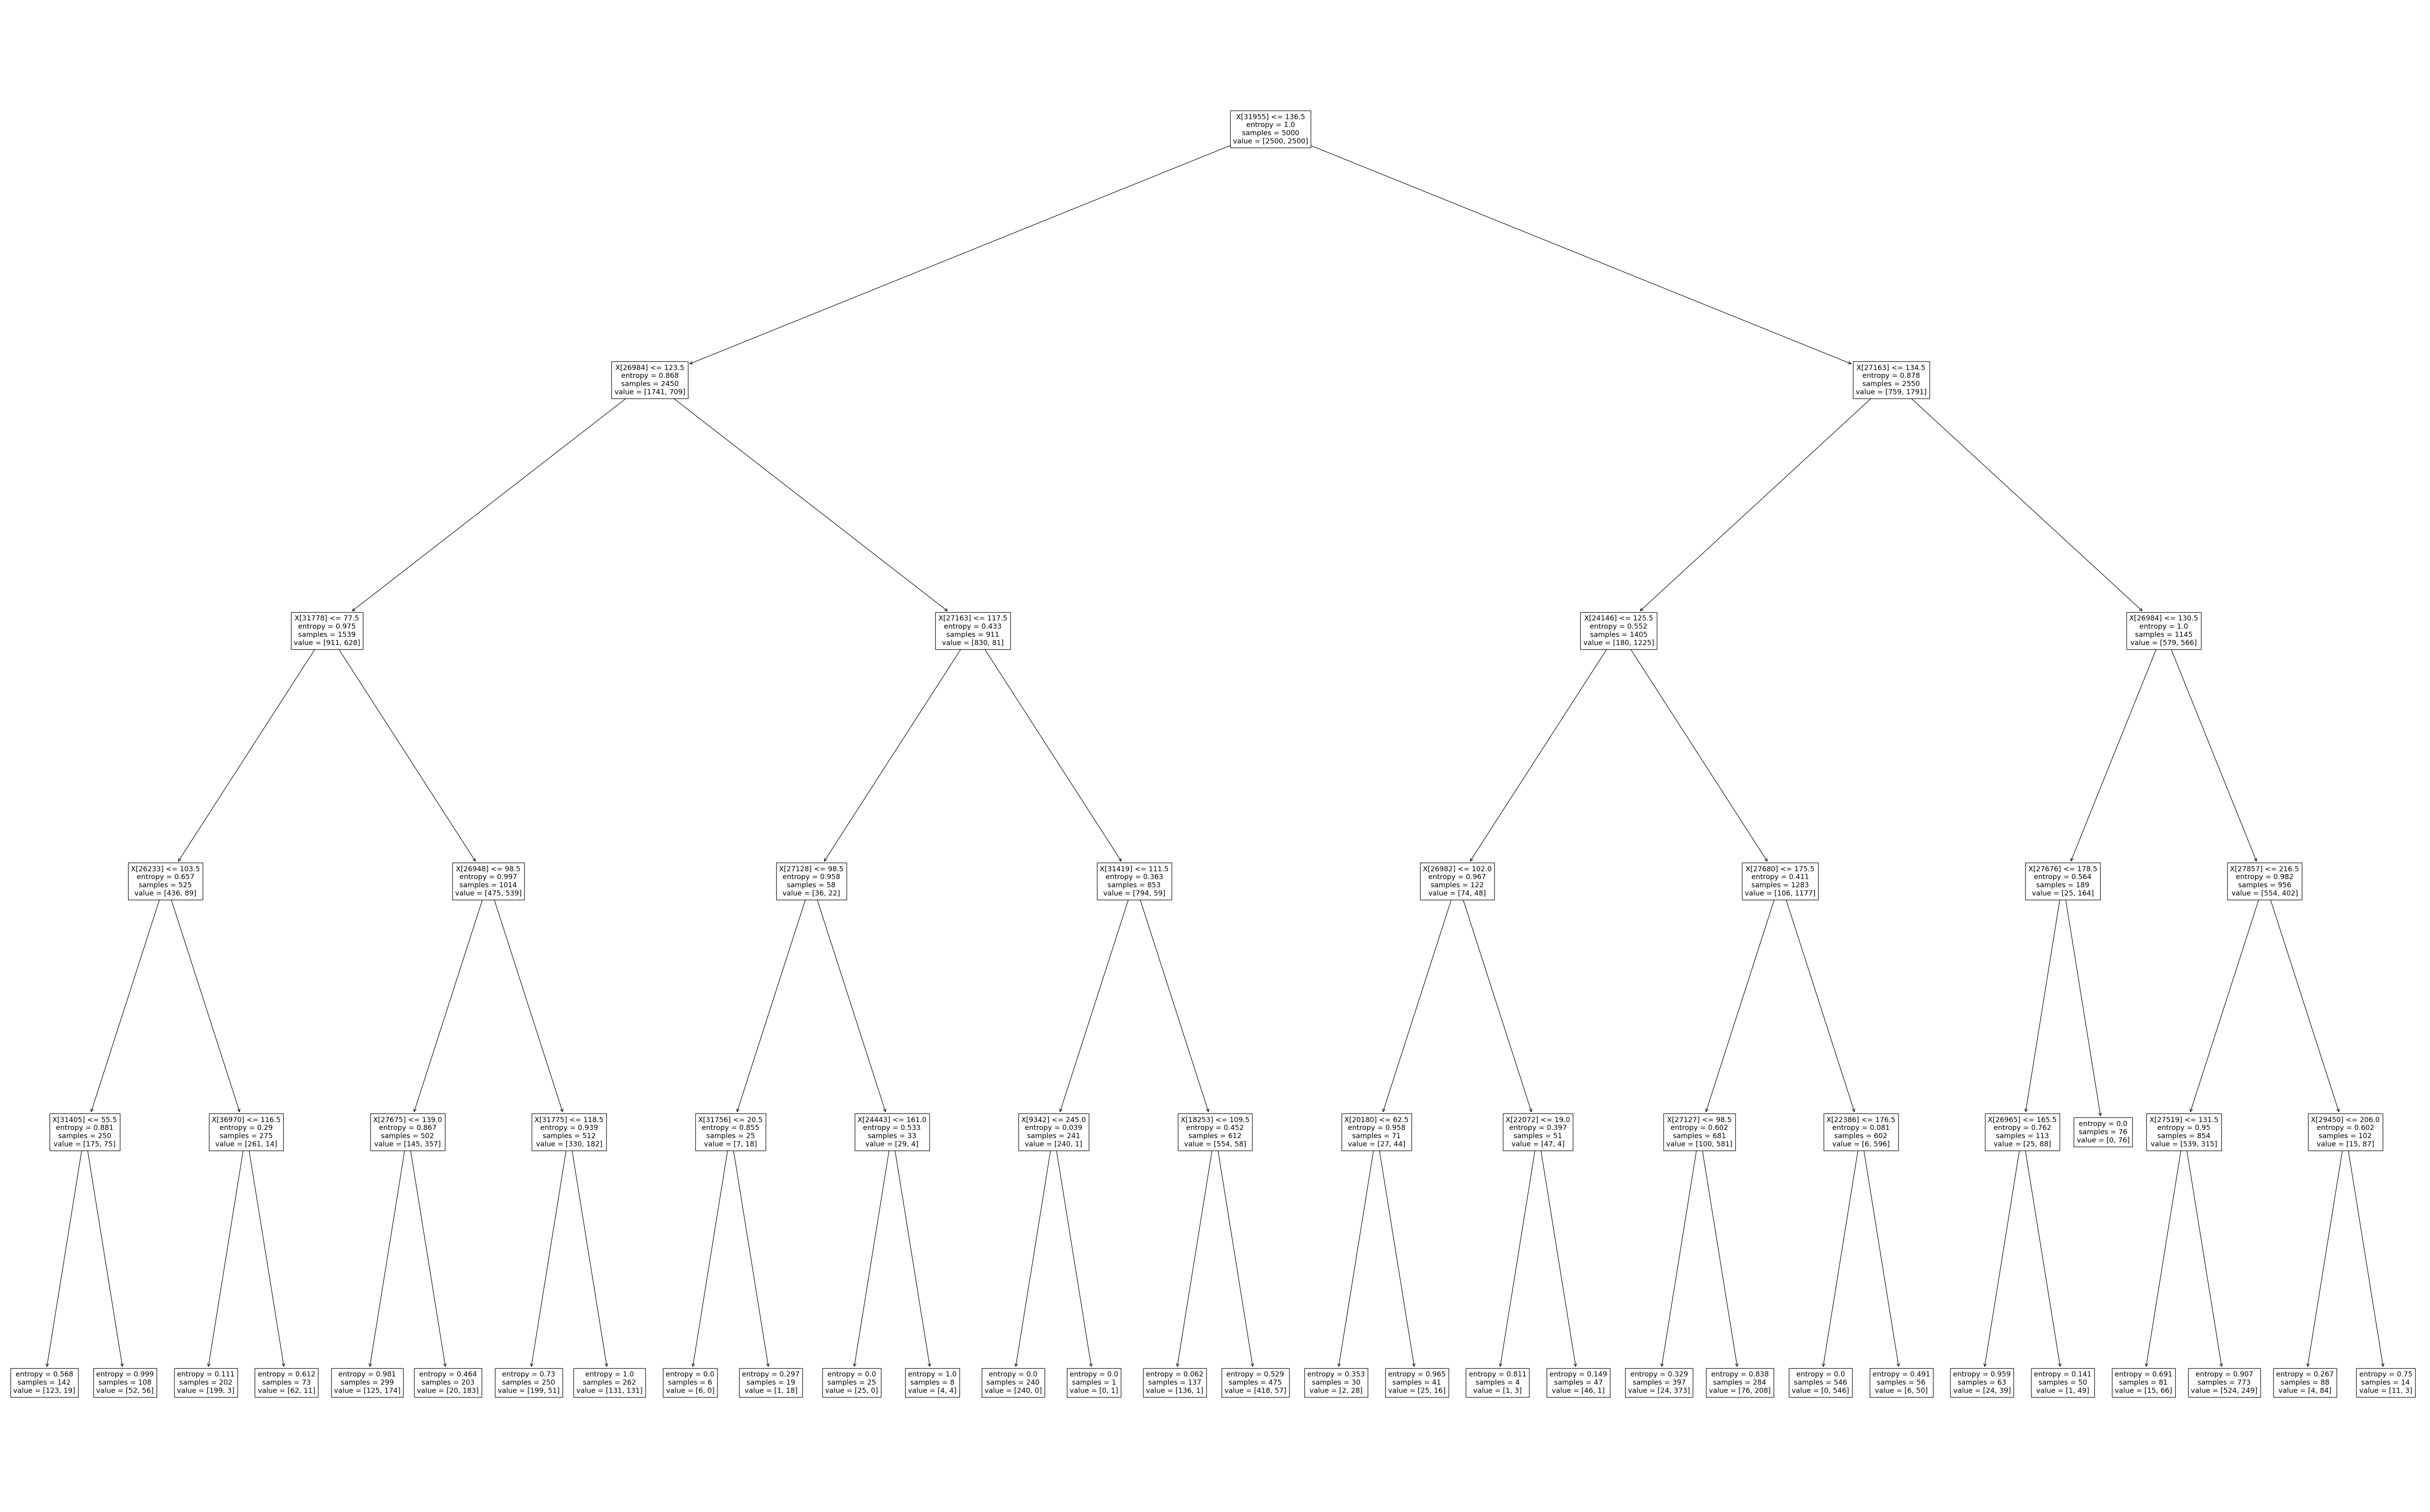

In [56]:
plot_tree(model)